In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA


In [8]:
df = pd.read_csv("categories_cleaned.csv")

In [17]:
X = df.iloc[:, 1:].values 

kmeans = KMeans(n_clusters=10, random_state=42)


kmeans.fit(X)
labels = kmeans.labels_


In [18]:
df['Cluster'] = labels
df.head()

,shiur,category_Gemara,category_Halacha,category_History,category_Holidays,category_Machshava,category_Midrash,category_Mishna,category_Nach,category_Parsha,...,subcategory_Yitro,subcategory_Yom Ha'atzmaut,subcategory_Yom Kippur,subcategory_Yom Tov,subcategory_Yoma,subcategory_Yoreh Deah,subcategory_Zachor,subcategory_Zevachim,Other,Cluster
0,1100127,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,1100126,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,1100125,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1100124,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1100123,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
cluster_counts = df['Cluster'].value_counts()
cluster_counts

Cluster
4    52186
8    49737
1    44433
2    40346
5    36810
3    25074
0    23690
9    12567
7    12122
6    11852
Name: count, dtype: int64

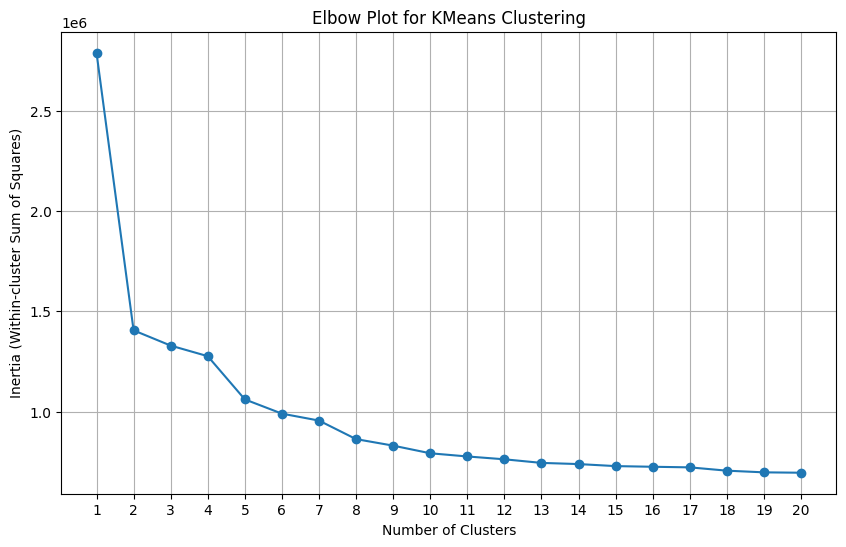

In [24]:
range_n_clusters = list(range(1, 21))

# List to store the inertia values for each number of clusters
inertia_values = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Plot for KMeans Clustering')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

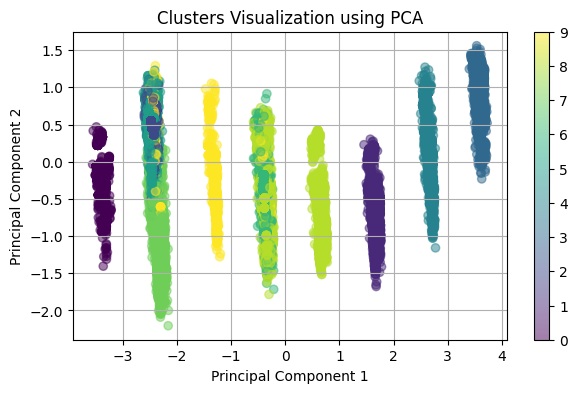

In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a new DataFrame with the PCA results and cluster labels
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = df['Cluster']

# Plot the clusters
plt.figure(figsize=(7, 4))
scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization using PCA')
plt.grid(True)
plt.show()

In [27]:
df['Cluster']

0         2
1         2
2         0
3         1
4         1
         ..
308812    1
308813    1
308814    1
308815    4
308816    4
Name: Cluster, Length: 308817, dtype: int32

In [28]:
shiur_df = pd.read_csv("shiurim_cleaned.csv")

In [29]:
df = shiur_df.merge(
         df[['shiur', 'Cluster']], on='shiur', how='left')

In [30]:
df

,Unnamed: 0,shiur,title,teacher_title,last_name,first_name,date,language,duration,keywords,category,middle_category,subcategory,location,location_type,series_name,series_description,full_details,Cluster
0,9,703884,Ketuvot 13,Rabbi,Sacks,Yonason,2002-10-09 00:00:00,NaN,4353.0,NaN,Gemara,Nashim,Ketuvot,NaN,NaN,Daily Shiur,The daily shiurim given in the Mazer Yeshiva P...,Title Ketuvot 13 Speaker Sacks Category Gemara,2
1,10,703885,Chullin 3,Rabbi Dr,Bleich,J David,2002-10-04 00:00:00,NaN,5238.0,NaN,Gemara,Kodshim,Chullin,NaN,NaN,Daily Shiur,The daily shiurim given in the Mazer Yeshiva P...,Title Chullin 3 Speaker Bleich Category Gemara,2
2,11,703886,Chullin 2,Rabbi Dr,Bleich,J David,2002-09-09 00:00:00,NaN,5175.0,NaN,Gemara,Kodshim,Chullin,NaN,NaN,Daily Shiur,The daily shiurim given in the Mazer Yeshiva P...,Title Chullin 2 Speaker Bleich Category Gemara,2
3,12,703888,The Power and Limitations of Jewish Justice,Rabbi,Charlop,Zevulun,2002-10-09 00:00:00,NaN,1466.0,Beit Din Beit Din Beit Din,Halacha,Miscellaneous,General,NaN,NaN,NaN,NaN,Title The Power and Limitations of Jewish Just...,1
4,15,703889,The Power and Limitations of Jewish Justice,Rabbi,Schachter,Hershel,2002-10-09 00:00:00,NaN,3165.0,Beit Din Beit Din Beit Din,Halacha,Miscellaneous,General,NaN,NaN,NaN,NaN,Title The Power and Limitations of Jewish Just...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308812,531641,1067080,Issur Veheter 5783 119 Pas Akum Bsadeh meikara...,Rabbi,Schwartz,Ezra,2023-06-06 00:00:00,EN,2982.0,NaN,Halacha,Yoreh Deah,Pat Akum,YU Wilf Campus,YU,Daily Shiur,The daily shiurim given in the Mazer Yeshiva P...,Title Issur Veheter 5783 119 Pas Akum Bsadeh m...,4
308813,531643,1067081,Pirkei Avot 118,Rabbi,Landau,Shlomo,2023-06-05 00:00:00,EN,177.0,mishnapirkeiavotavos,Mishna,Nezikin,Avot,NaN,NaN,Five Minute Mishna,NaN,Title Pirkei Avot 118 Speaker Landau Category ...,0
308814,531644,1067082,Pirkei Avot 21,Rabbi,Landau,Shlomo,2023-06-06 00:00:00,EN,269.0,mishnapirkeiavotavos,Mishna,Nezikin,Avot,NaN,NaN,Five Minute Mishna,NaN,Title Pirkei Avot 21 Speaker Landau Category M...,0
308815,531645,1067083,Rav Ahron RubensteinTanya perek 9 p2 Hashems g...,Rabbi,Rubenstein,Yehoshua,2023-06-06 00:00:00,EN,2346.0,NaN,Machshava,Sefarim,Tanya,NaN,NaN,NaN,NaN,Title Rav Ahron RubensteinTanya perek 9 p2 Has...,1
